# 5051 Project 1

## ZHANG Juntao - 20908272

In [1]:
# required packages
import time
import timeit
import pandas as pd
import matplotlib.pyplot as plt
import sys   

# set recursionlimit to avoid stack overflow
sys.setrecursionlimit(70000)

In [2]:
traffic_data = pd.read_csv('Desktop/sort_exercises_with_data/data/TDCS_M06A_20190830_080000.csv', header=None)

def check_sort_result(func, data):
    start = time.time()
    data_copy = data[:] # important -- copy the list, instead of copy the reference.
    result = func(data_copy)
    time_used = time.time() - start
    for i in range(len(result)-1):
        if result[i] > result[i+1]:
            print("Check failed: func(data) is not sorted properly.")
            return
    print("The method {0} returned successfully for data size {1} with {2} seconds.".format(func.__name__.center(15), len(result), time_used))

    
def check_performance(func, data):
    size_samples = [len(data)//5, len(data)//4, len(data)//3, len(data)//2, len(data)]
    timing_array = []
    for size in size_samples:
        n_repeated = size_samples[-1] // size
        start = time.time()
        for run in range(n_repeated):
            data_truncated = data[:size]
            func(data_truncated)
        timing_array.append((time.time() - start) / n_repeated)
    ref_linear = [i * timing_array[0] / size_samples[0] for i in size_samples]
    ref_quadratic = [i**2 * timing_array[0] / size_samples[0]**2 for i in size_samples]
    plt.loglog(size_samples, ref_linear, marker='.', label='O($n$)')
    plt.loglog(size_samples, ref_quadratic, marker='.', label='O($n^2$)')
    plt.loglog(size_samples, timing_array, marker='.', label='Time complexity')
    plt.legend()
    plt.show()
    
    
traffic_data.head()

,0,1,2,3,4,5,6,7
0,31,2019-08-30 08:17:14,03F3307N,2019-08-30 08:17:14,03F3307N,5.2,Y,2019-08-30 08:17:14+03F3307N
1,31,2019-08-30 08:01:02,03F0648S,2019-08-30 08:01:02,03F0648S,5.6,Y,2019-08-30 08:01:02+03F0648S
2,31,2019-08-30 08:51:45,03F0648N,2019-08-30 08:57:09,03F0559N,13.9,Y,2019-08-30 08:51:45+03F0648N; 2019-08-30 08:57...
3,31,2019-08-30 08:20:45,03F3854S,2019-08-30 08:20:45,03F3854S,8.6,Y,2019-08-30 08:20:45+03F3854S
4,32,2019-08-30 08:06:10,03F4168S,2019-08-30 08:09:33,03F4232S,9.3,Y,2019-08-30 08:06:10+03F4168S; 2019-08-30 08:09...


In [3]:
import merge_sort
import quicksort
import heap
import binary_search_tree
import AVL_tree

column_0 = [row[0] for row in traffic_data.values.tolist()][:]
column_1 = [row[1] for row in traffic_data.values.tolist()][:]
column_2 = [row[2] for row in traffic_data.values.tolist()][:]

In [4]:
check_sort_result(merge_sort.merge_sort, column_2)
check_sort_result(quicksort.quicksort, column_2)
check_sort_result(heap.heap_sort, column_2)
# check_sort_result(binary_search_tree.BST_sort, column_2)
# check_sort_result(AVL_tree.AVL_sort, column_2)

The method    merge_sort   returned successfully for data size 259623 with 1.124011754989624 seconds.
The method    quicksort    returned successfully for data size 259623 with 21.15541696548462 seconds.
The method    heap_sort    returned successfully for data size 259623 with 3.7148518562316895 seconds.


In [5]:
check_sort_result(merge_sort.merge_sort, column_1)
check_sort_result(quicksort.quicksort, column_1)
check_sort_result(heap.heap_sort, column_1)
# check_sort_result(binary_search_tree.BST_sort, column_1)
# check_sort_result(AVL_tree.AVL_sort, column_1)

The method    merge_sort   returned successfully for data size 259623 with 1.1532700061798096 seconds.
The method    quicksort    returned successfully for data size 259623 with 1.5242760181427002 seconds.
The method    heap_sort    returned successfully for data size 259623 with 3.7448530197143555 seconds.


In [6]:
check_sort_result(merge_sort.merge_sort, column_0)
# check_sort_result(quicksort.quicksort, column_0)
check_sort_result(heap.heap_sort, column_0)
# check_sort_result(binary_search_tree.BST_sort, column_0)
# check_sort_result(AVL_tree.AVL_sort, column_0)

The method    merge_sort   returned successfully for data size 259623 with 1.0723047256469727 seconds.
The method    heap_sort    returned successfully for data size 259623 with 1.9270260334014893 seconds.


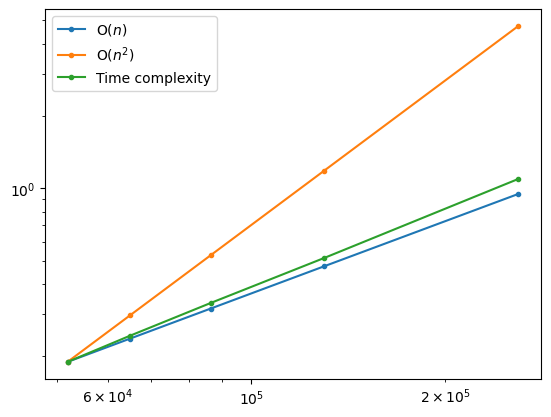

In [7]:
check_performance(merge_sort.merge_sort, column_0)

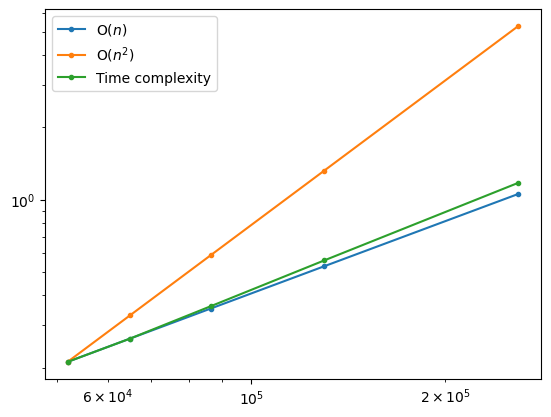

In [8]:
check_performance(merge_sort.merge_sort, column_1)

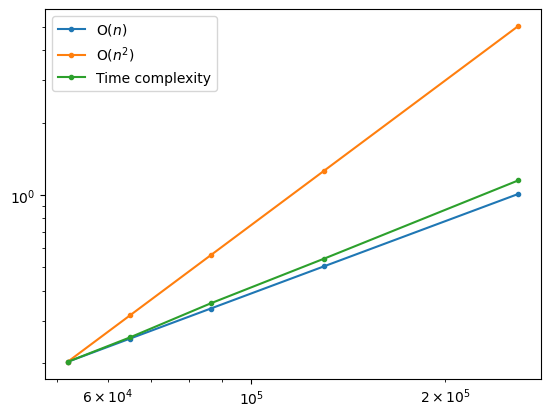

In [9]:
check_performance(merge_sort.merge_sort, column_2)

In [10]:
merge_sort.merge_sort(column_0)[:10]

[5, 5, 5, 5, 5, 5, 5, 5, 5, 5]

In [11]:
merge_sort.merge_sort(column_1)[:10]

['2019-08-30 08:00:00',
 '2019-08-30 08:00:00',
 '2019-08-30 08:00:00',
 '2019-08-30 08:00:00',
 '2019-08-30 08:00:00',
 '2019-08-30 08:00:00',
 '2019-08-30 08:00:00',
 '2019-08-30 08:00:00',
 '2019-08-30 08:00:00',
 '2019-08-30 08:00:00']

In [12]:
merge_sort.merge_sort(column_2)[:10]

['01F0005N',
 '01F0005N',
 '01F0005N',
 '01F0005N',
 '01F0005N',
 '01F0005N',
 '01F0005N',
 '01F0005N',
 '01F0005N',
 '01F0005N']